# Etape 1
* Importez les bibliothèques nécessaires

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker # voir Etape 8.4
import calendar # pour Etape 9 (si elle existe,autant en profiter)


# Etape 2
* Importez l'ensemble de données à partir de vente_detail.csv

In [2]:
data_vente_detail=pd.read_csv("data/vente_detail.csv")

# Etape 3
* Affectez-le à une variable appelée online_rt

In [3]:
online_rt=pd.DataFrame(data_vente_detail)

<p style="font-size:28px ;text-align:center;color:blue"> Quelques infos sur nos donnees</p>

In [4]:
online_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


<p style="font-size:28px ;text-align:center;color:red"> clairement la colonne 0 et l'index posent probleme
<br><br/>
Par soucis de coherence,je me permet de rectifier l'index
</p>

In [5]:
online_rt=(online_rt.reset_index()
    .rename(columns={"Unnamed: 0":"Id"})
    .set_index("Id")) # voir le help pour des details 
# l'ancienne index devient la colonne "index" on doit la supprimer
online_rt.drop("index",axis=1,inplace=True) #voir le help de euro12.drop pour savoir comment supprimer une colonne
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
online_rt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


# Etape 4
* Créez un histogramme avec les 10 pays qui ont le plus de « Quantité » commandée, à l'exception du Royaume-Uni

In [7]:
online_rt_no_UK = online_rt.loc[online_rt.loc[:,"Country"]!="United Kingdom"]
top10_pays= online_rt_no_UK.groupby("Country")["Quantity"].sum() .sort_values(ascending=False).head(10)

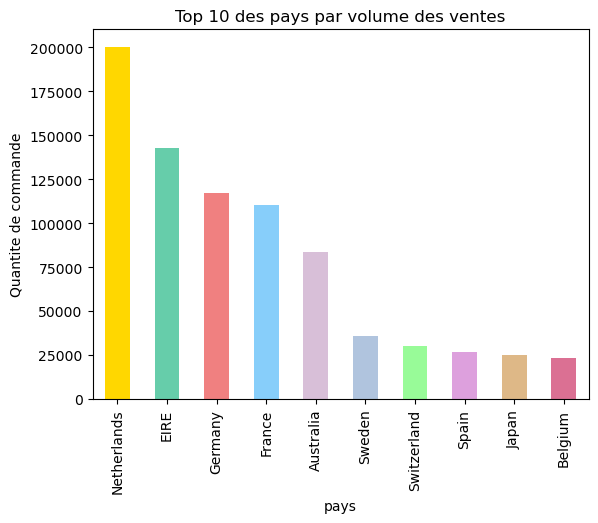

In [8]:

top10_pays.plot(kind='bar', color=["gold", "mediumaquamarine", "lightcoral", "lightskyblue", "thistle", "lightsteelblue", "palegreen", "plum", "burlywood", "palevioletred"])
plt.xlabel("pays")
plt.ylabel("Quantite de commande")
plt.title("Top 10 des pays par volume des ventes")
plt.show()

# Étape 5 
* Exclure les entrées de quantité négatives

In [9]:
online_rt = online_rt.loc[online_rt.loc[:,'Quantity']>=0] 

In [10]:
online_rt_no_UK =online_rt.loc[online_rt.loc[:,"Country"]!="United Kingdom" ].copy() # on met a jour la variable online_rt_no_UK

# Etape 6 
* Créez un nuage de points avec la quantité par unité de prix par CustomerID pour les 3 premiers pays (sauf le Royaume-Uni)

In [11]:
# on ne divise jamais par zeros
# on va eliminer les lignes avec des unitprice nulles
online_rt_no_UK =online_rt_no_UK.loc[online_rt_no_UK.loc[:,"UnitPrice"] != 0]

In [12]:
# creation de la colonne Quantité par Unité de Prix
online_rt_no_UK.loc[:,"Quantite_par_UnitPrice"] = online_rt_no_UK.loc[:,"Quantity"] / online_rt_no_UK.loc[:,"UnitPrice"]

top3_pays = online_rt_no_UK.groupby("Country")["Quantite_par_UnitPrice"].sum() .sort_values(ascending=False).head(3)


In [13]:
top3_pays

Country
Netherlands    230176.986544
EIRE           205900.567089
Germany        158794.268697
Name: Quantite_par_UnitPrice, dtype: float64

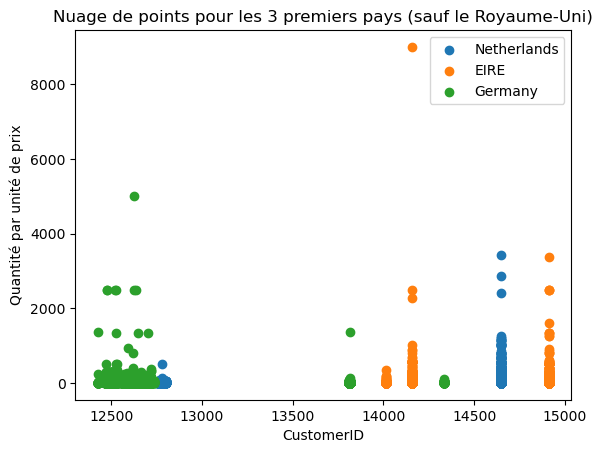

In [14]:
# Sélection des données pour les trois premiers pays
selected_countries = top3_pays.index.tolist()
data_selected_countries = online_rt_no_UK.loc[online_rt_no_UK.loc[:,'Country'].isin(selected_countries)]
# Création du nuage de points
for country in selected_countries:
    data_country = data_selected_countries[data_selected_countries['Country'] == country]
    plt.scatter(data_country['CustomerID'], data_country['Quantite_par_UnitPrice'], label=country)
plt.xlabel("CustomerID")
plt.ylabel("Quantité par unité de prix")
plt.title("Nuage de points pour les 3 premiers pays (sauf le Royaume-Uni)")
plt.legend()
plt.show()

# Etape 7.1
* Regardez la première ligne de code de l'étape 6. Et essayez de déterminer si cela entraîne un problème quelconque.

In [15]:
# seul 18 lignes ont ete supprimer,cela ne pose aucun probleme

# Etape 7.1.1
* Affichez les premières lignes de ce DataFrame

In [16]:
online_rt_no_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantite_par_UnitPrice
Id,,,,,,,,,
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France,6.400000
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France,6.400000
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France,3.200000
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France,14.117647
30,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France,36.923077


# Etape 7.2
* Affichez le type de UnitPrice

In [17]:
print(online_rt_no_UK['UnitPrice'].dtype)

float64


# Etape 7.3
* Extrayez les données de online_rt pour les ID client 12346.0 et 12347.0.

In [18]:
data_extrait= online_rt.loc[online_rt['CustomerID'].isin([12346.0, 12347.0])]

In [19]:
data_extrait

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Id,,,,,,,,
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland


In [20]:
#  examinons le data frame  online_rt_no_UK 
online_rt_no_UK.loc[online_rt_no_UK['CustomerID'].isin([12346.0, 12347.0])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantite_par_UnitPrice
Id,,,,,,,,,
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland,5.714286
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland,0.941176
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland,3.692308
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland,55.384615
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland,9.600000
...,...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland,11.764706
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland,6.153846
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland,19.277108


# Etape 7.2
* Réinterprétation du problème initial.

# Etape 7.2.1
* Découvrez les 3 premiers pays en termes de volume de ventes.

In [21]:
top3_pays_volume= online_rt_no_UK.groupby("Country")["Quantity"].sum() .sort_values(ascending=False).head(3).index.tolist()

In [22]:
top3_pays_volume

['Netherlands', 'EIRE', 'Germany']

# Etape 7.2.2
* R.A.S !

# Étape 7.3
* Modifier, sélectionner et tracer des données

# Étape 7.3.1 
* Ajoutez une colonne à online_rt appelée Revenue et calculez  les revenus (Quantity * UnitPrice) de chaque vente.

In [23]:
online_rt.loc[:,"Revenue"] = online_rt.loc[:,"Quantity"] * online_rt.loc[:,"UnitPrice"]

In [24]:
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
Id,,,,,,,,,
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France,16.60


# Étape 7.3.2
* Regroupez par CustomerID et Country et découvrez le prix moyen (AvgPrice) que chaque client dépense par unité

In [25]:

avg_price_par_customer = online_rt.groupby(["CustomerID", "Country"]).agg({'Revenue': 'mean', 'Quantity': 'sum'}).reset_index()

print(avg_price_par_customer.head())


   CustomerID         Country       Revenue  Quantity
0     12346.0  United Kingdom  77183.600000     74215
1     12347.0         Iceland     23.681319      2458
2     12348.0         Finland     57.975484      2341
3     12349.0           Italy     24.076027       631
4     12350.0          Norway     19.670588       197


# Étape 7.3.3 
* Tracer

In [26]:
online_rt_no_UK =online_rt.loc[online_rt.loc[:,"Country"]!="United Kingdom" ].copy() # on met a jour la variable online_rt_no_UK
avg_price_par_customer = online_rt_no_UK.groupby(["CustomerID", "Country"]).agg({"Revenue": "mean", "Quantity": "sum"}).reset_index()
# on reste dans la logique du projet: on exclut UK

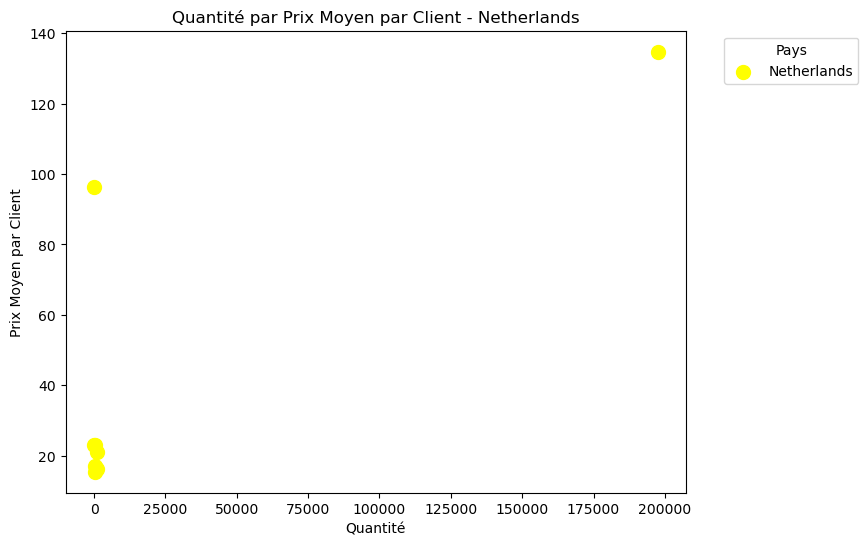

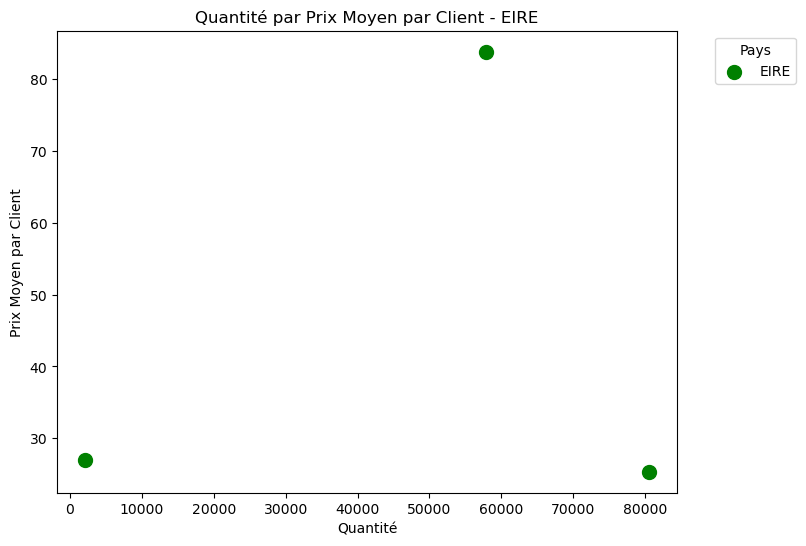

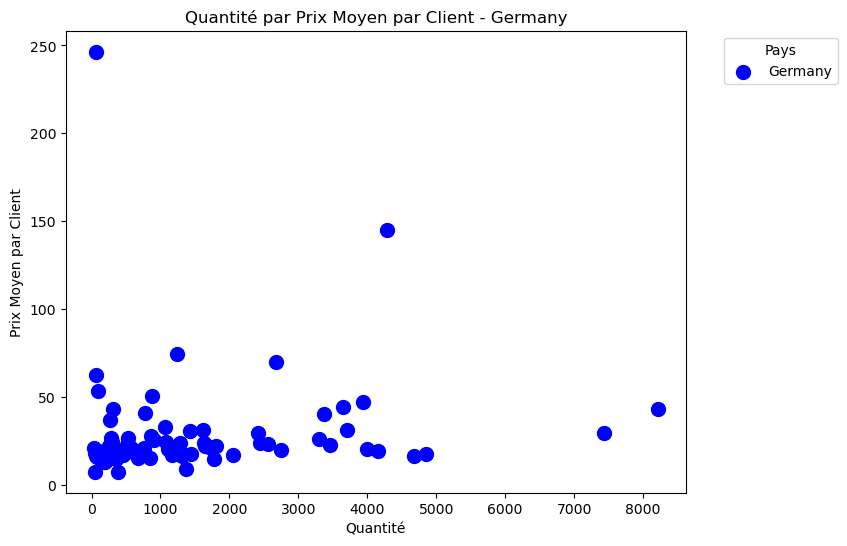

In [27]:
couleurs = ["yellow", "green", "blue"]
for i, pays in enumerate(top3_pays_volume):
    data_country = avg_price_par_customer[avg_price_par_customer["Country"] == pays]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(data_country['Quantity'], data_country["Revenue"], label=pays, s=100, color=couleurs[i])
    
    plt.title(f"Quantité par Prix Moyen par Client - {pays}")
    plt.xlabel("Quantité")
    plt.ylabel("Prix Moyen par Client")
    
    # Affiche la légende avec une position ajustée
    plt.legend(title="Pays", bbox_to_anchor=(1.05, 1), loc="upper left")
    
    # Affiche le graphique
    plt.show()

# Etape 7.4.1
* Tracer les données pour chaque CustomerID sur un seul graphique.

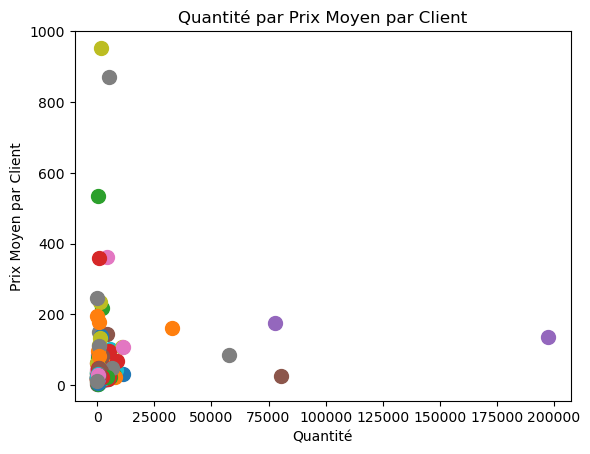

In [28]:
# Parcours des CustomerID pour les ajouter au graphique
for customer_id in avg_price_par_customer['CustomerID'].unique():
    data_customer = avg_price_par_customer[avg_price_par_customer['CustomerID'] == customer_id]
    plt.scatter(data_customer['Quantity'], data_customer['Revenue'], label=None, s=100)

plt.title("Quantité par Prix Moyen par Client")
plt.xlabel("Quantité")
plt.ylabel('Prix Moyen par Client')
# surtout pas de legende !
plt.show()


# Etape 7.4.2
* Zoom avant sur le graphique pour voir la courbe plus clairement


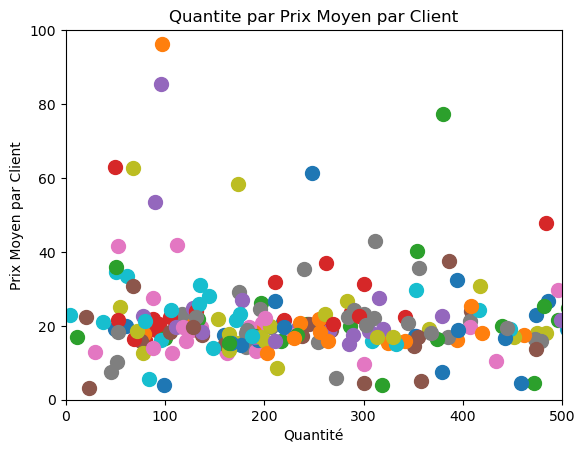

In [29]:
for customer_id in avg_price_par_customer["CustomerID"].unique():
    data_customer = avg_price_par_customer[avg_price_par_customer["CustomerID"] == customer_id]  
    plt.scatter(data_customer["Quantity"], data_customer["Revenue"], label=None, s=100)# pas de legende ...

plt.title("Quantite par Prix Moyen par Client")
plt.xlabel("Quantité")
plt.ylabel("Prix Moyen par Client")

# Zoom avant en définissant les limites des axes
plt.xlim(0, 500)   # on ne perd rien en generalite en excluant les quelques valeurs abherents
plt.ylim(0, 100)   # parcontre je ne peut pas evaluer leur nombre


plt.show()


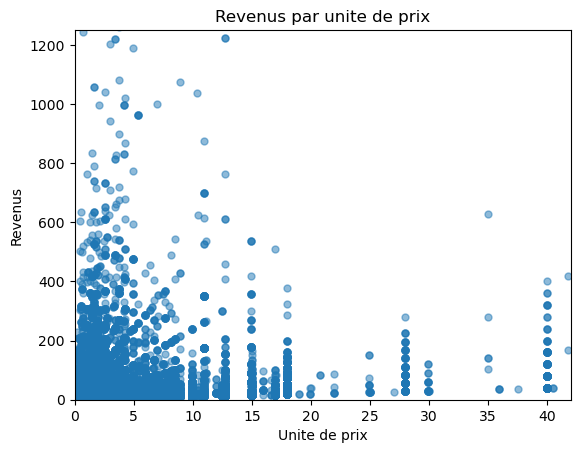

In [30]:
plt.plot(online_rt_no_UK["UnitPrice"], online_rt_no_UK["Revenue"], marker='o', linestyle='', markersize=5, alpha=0.5)
plt.title("Revenus par unite de prix")
plt.xlabel("Unite de prix")
plt.ylabel("Revenus")
plt.xlim(0, 42)   # on ne perd pas grand monde en zoomant ainsi (parcontre on en exclue combien ?!)
plt.ylim(0, 1250)  
plt.show()


## L'étape 7 nous a-t-elle donné des informations sur les données ? Sûr! Au fur et à mesure que le prix moyen augmente, la quantité commandée diminue. Mais ce n'est guère surprenant. Ce serait étonnant que ce ne soit pas le cas !

## Reponse : excacte, c'est ce que nos graphes nous permettent de voir apres avoir zoomer

# Etape 8.1
* Grouper le prix unitaire par intervalles de 1 pour les prix [0,50), et additionner les quantités d’une part et les revenus d’autres part.

In [31]:

bins = pd.cut(online_rt_no_UK['UnitPrice'], bins=range(0, 51))
# Ajoute une colonne 'PriceInterval' a online_rt_no_UK
online_rt_no_UK['PriceInterval'] = bins
grouped_prices = online_rt_no_UK.groupby('PriceInterval').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()
print(grouped_prices)


   PriceInterval  Quantity    Revenue
0         (0, 1]    371084  201751.43
1         (1, 2]    340500  500650.04
2         (2, 3]    109037  269142.86
3         (3, 4]     39969  144071.29
4         (4, 5]     31988  143901.25
5         (5, 6]      7059   40760.56
6         (6, 7]      4013   26786.05
7         (7, 8]      4809   37059.55
8         (8, 9]      5093   43036.62
9        (9, 10]      1833   18238.35
10      (10, 11]      2995   32679.90
11      (11, 12]       180    2050.20
12      (12, 13]      2189   27835.00
13      (13, 14]         0       0.00
14      (14, 15]      1695   25357.85
15      (15, 16]        41     653.95
16      (16, 17]       447    7574.20
17      (17, 18]      2028   36504.00
18      (18, 19]         2      37.90
19      (19, 20]         7     139.75
20      (20, 21]         8     166.40
21      (21, 22]        10     219.50
22      (22, 23]         0       0.00
23      (23, 24]         0       0.00
24      (24, 25]        32     798.70
25      (25,

# Etape 8.3
* Tracer

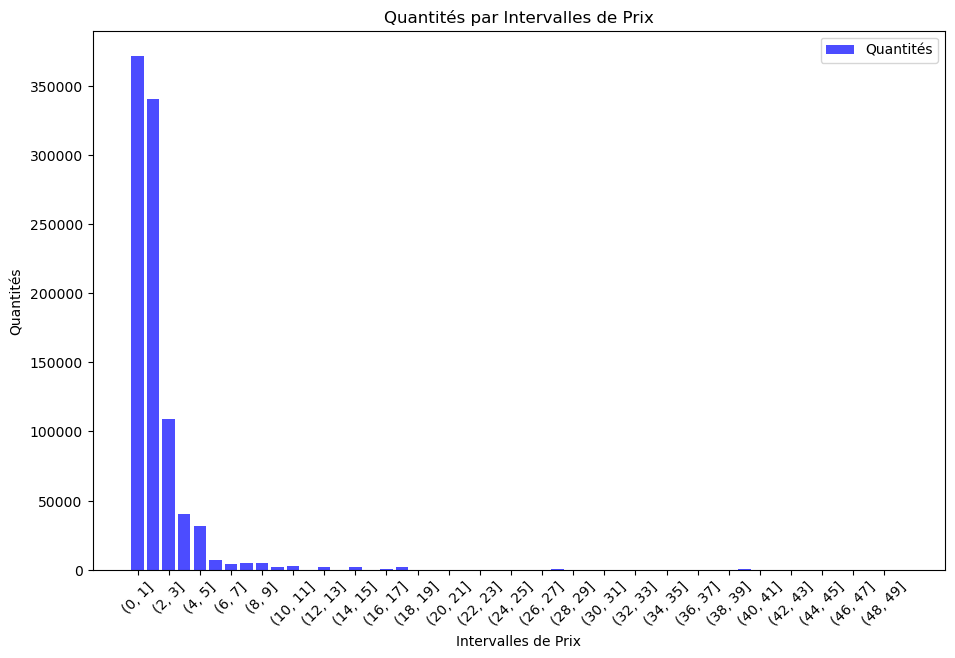

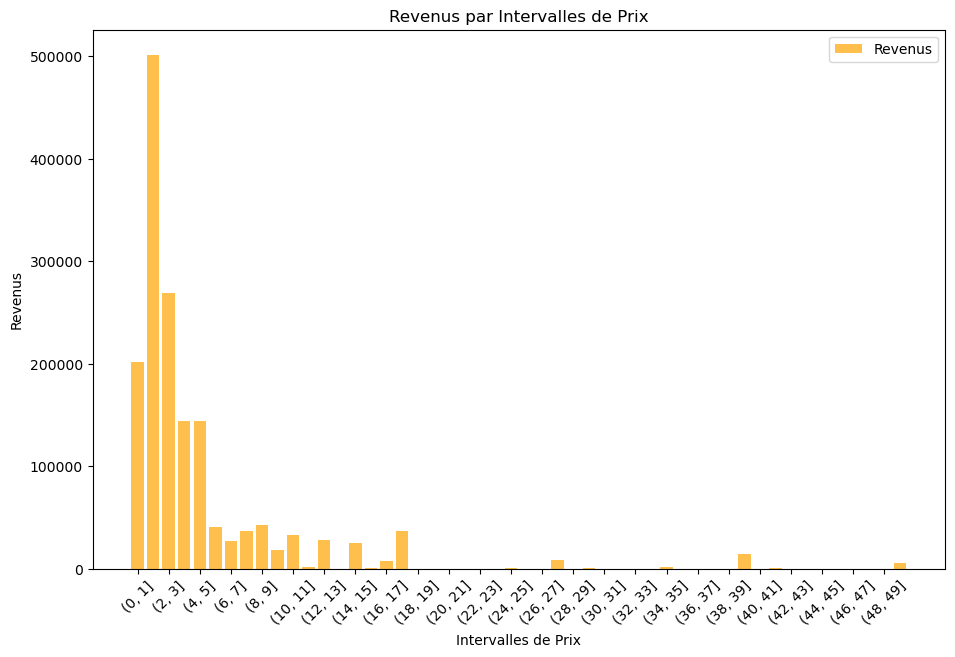

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

bins = pd.cut(online_rt_no_UK["UnitPrice"], bins=range(0, 51))
online_rt_no_UK["PriceInterval"] = bins

grouped_prices = online_rt_no_UK.groupby('PriceInterval').agg({"Quantity": "sum", "Revenue": "sum"}).reset_index()
interval_labels = grouped_prices["PriceInterval"].astype(str)

plt.figure(figsize=(11, 7))
plt.bar(interval_labels, grouped_prices['Quantity'], width=0.8, color="blue", alpha=0.7, label="Quantités")
plt.xlabel("Intervalles de Prix")
plt.ylabel("Quantités")
plt.title("Quantités par Intervalles de Prix")
plt.legend()
plt.xticks(rotation=45)
plt.xticks(ticks=range(0, len(interval_labels), 2), labels=interval_labels[::2])
plt.show()

plt.figure(figsize=(11, 7))
plt.bar(interval_labels, grouped_prices['Revenue'], width=0.8, color="orange", alpha=0.7, label="Revenus")
plt.xlabel("Intervalles de Prix")
plt.ylabel("Revenus")
plt.title("Revenus par Intervalles de Prix")
plt.legend()
plt.xticks(rotation=45)
plt.xticks(ticks=range(0, len(interval_labels), 2), labels=interval_labels[::2])
plt.show()


# Etape 8.4
* Rendez-le plus joli.
    l'axe des abscisses a besoin de valeurs.
    l'axe des y n'est pas si facile à lire ; montrer en termes de millions.


In [33]:
#  l'axe des abscisses a besoin de valeurs. ==> finish

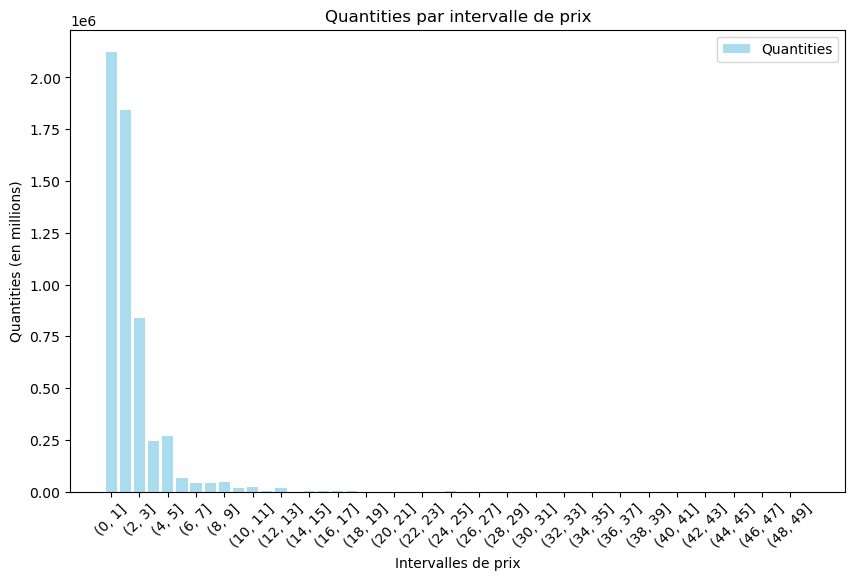

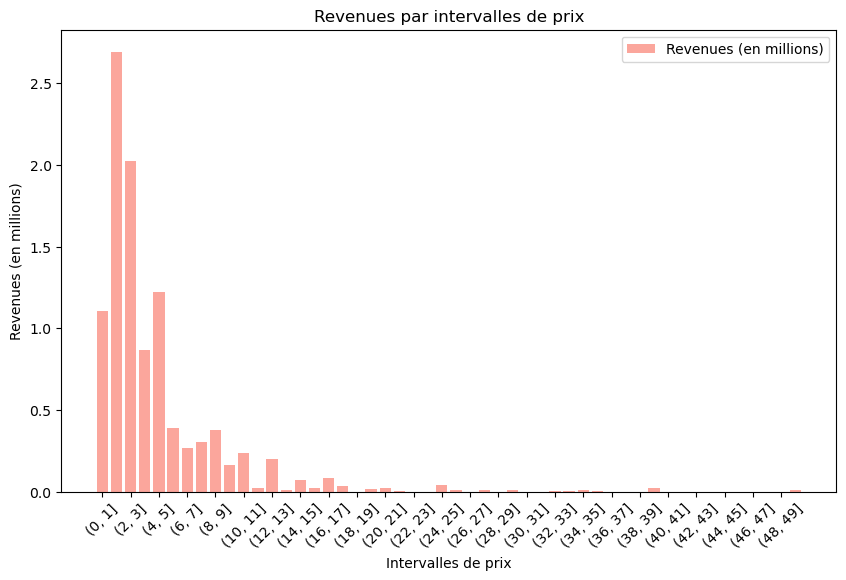

In [34]:
# Create intervals of 1 for prices in the range [0, 50)
bins = pd.cut(online_rt["UnitPrice"], bins=range(0, 51))

online_rt["PriceInterval"] = bins

grouped_prices = online_rt.groupby("PriceInterval").agg({"Quantity": "sum", "Revenue": "sum"}).reset_index()

interval_labels = grouped_prices["PriceInterval"].astype(str)

colors_quantities = "skyblue"
colors_revenue = "salmon"

# figure 1
plt.figure(figsize=(10, 6))
plt.bar(interval_labels, grouped_prices["Quantity"], width=0.8, color=colors_quantities, alpha=0.7, label="Quantities")
plt.xlabel("Intervalles de prix")
plt.ylabel("Quantities (en millions)")
plt.title("Quantities par intervalle de prix")
plt.legend()
plt.xticks(rotation=45)
plt.xticks(ticks=range(0, len(interval_labels), 2), labels=interval_labels[::2])
plt.show()

# figure 2
plt.figure(figsize=(10, 6))
plt.bar(interval_labels, grouped_prices["Revenue"] / 1e6, width=0.8, color=colors_revenue, alpha=0.7, label="Revenues (en millions)")
plt.xlabel("Intervalles de prix")
plt.ylabel("Revenues (en millions)")
plt.title("Revenues par intervalles de prix")
plt.legend()
plt.xticks(rotation=45)
plt.xticks(ticks=range(0, len(interval_labels), 2), labels=interval_labels[::2])
plt.show()



# ======================== Bonus ======================

# Etape 9.1
 * Créez une nouvelle colonne 'Month' extrayant le mois de la date.

In [35]:
online_rt['InvoiceDate'] = pd.to_datetime(online_rt['InvoiceDate'], errors='coerce')
online_rt['Month'] = online_rt['InvoiceDate'].dt.month
# A debuger un probeleme de formatage des dates --- time elapsed ----------

C:\Users\HP\AppData\Local\Temp\ipykernel_1368\2147540582.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  online_rt['InvoiceDate'] = pd.to_datetime(online_rt['InvoiceDate'], errors='coerce')


# Etape 9.2
 * Créez un graphique montrant le total des ventes chaque mois.

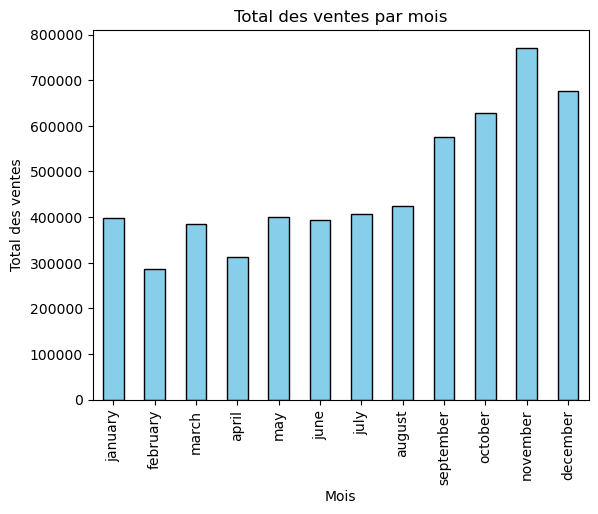

In [36]:
monthly_sales = online_rt.groupby('Month')['Quantity'].sum()
months_names_fr = [calendar.month_name[i].lower() for i in range(1, 13)] # ca marche pas 
monthly_sales.index = months_names_fr

monthly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total des ventes par mois")
plt.xlabel("Mois")
plt.ylabel("Total des ventes")
plt.show()

# Etape 9.3
* Analysez les mois avec les top ventes et ceux avec les bad vende

In [37]:
max_sales_month = monthly_sales.idxmax()
min_sales_month = monthly_sales.idxmin()

print(f"Le mois avec les ventes les plus élevées est {max_sales_month}.")
print(f"Le mois avec les ventes les plus basses est {min_sales_month}.")


Le mois avec les ventes les plus élevées est november.
Le mois avec les ventes les plus basses est february.


# Fin partie E de Pandas